In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [2]:
df=pd.read_csv("Downloads/student_assignment.csv")

In [3]:
df

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [4]:
df.shape


(104, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [6]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 101
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           100 non-null    float64
 1   Income        101 non-null    float64
 2   Is Student    101 non-null    object 
 3   Num Children  98 non-null     float64
 4   Temperature   101 non-null    float64
 5   Rating        101 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.5+ KB


In [14]:
df.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [34]:
df["Age"].mean()

46.64646464646464

In [35]:
df["Age"].median()

37.0

<AxesSubplot:>

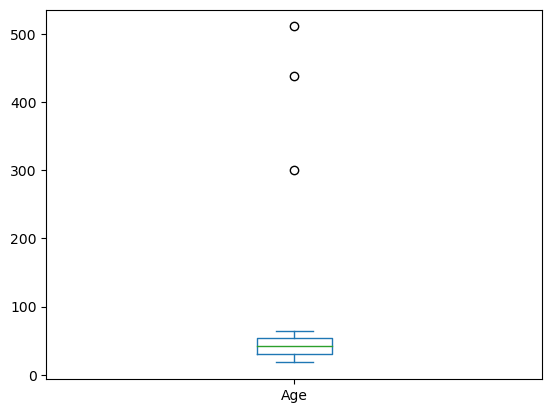

In [16]:
df['Age'].plot(kind= 'box')

In [13]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [15]:
#Script to find the outliers
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

Age
Outliers =  7     511.0
19    301.0
47    438.0
Name: Age, dtype: float64
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [17]:
df = df[~(df['Age']>100)]

<AxesSubplot:>

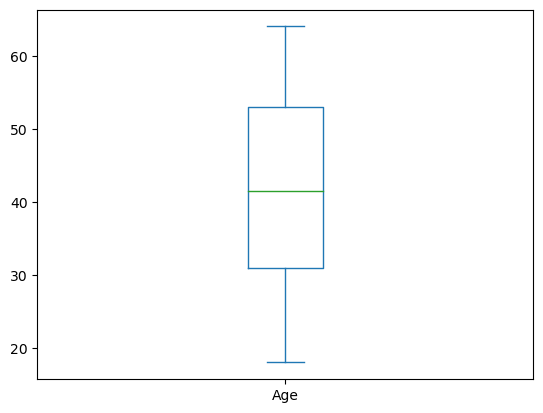

In [18]:
df['Age'].plot(kind= 'box')

In [23]:
df.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64

<AxesSubplot:>

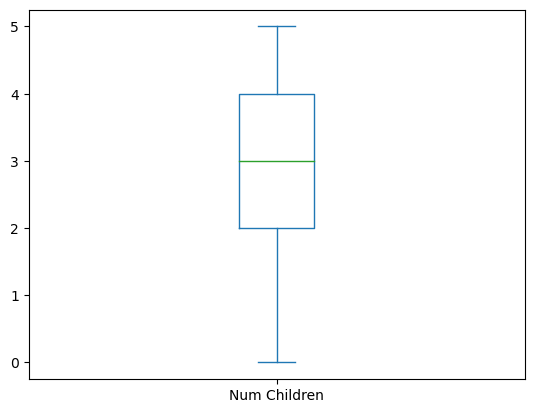

In [27]:
df['Num Children'].plot(kind= 'box')

In [22]:
df['Num Children']=df['Num Children'].fillna(df['Num Children'].median())

C:\Users\sridhara\AppData\Local\Temp\ipykernel_14100\398673791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num Children']=df['Num Children'].fillna(df['Num Children'].median())


In [25]:
df

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,42.0,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
96,48.0,90964.58,False,2.0,38.9,3.9
97,58.0,70679.33,True,4.0,41.3,4.8
98,50.0,97052.37,True,2.0,37.1,4.6
99,42.0,46673.04,False,5.0,38.8,10.9


In [26]:
df = df[df['Num Children']<10]

<AxesSubplot:>

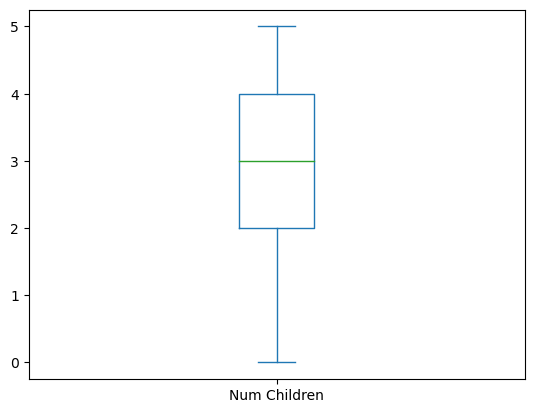

In [28]:
df['Num Children'].plot(kind= 'box')

In [29]:
df['Is Student'].unique()

array(['True', 'False', 'NO', 'Yes', 'false', 'true', 'YES'], dtype=object)

In [30]:
df['Is Student'].replace({'True':'TRUE','Yes':'TRUE','true':'TRUE','YES':'TRUE','False':'FALSE','false':'FALSE','NO':'FALSE'}, inplace = True)


C:\Users\sridhara\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
df['Is Student'].unique()

array(['TRUE', 'FALSE'], dtype=object)

In [32]:
df_data_num = df.select_dtypes(include = np.number)

In [33]:
df_data_num

,Age,Income,Num Children,Temperature,Rating
0,43.0,45893.41,0.0,38.2,2.6
1,56.0,69663.07,1.0,38.7,3.2
2,42.0,45124.06,5.0,36.9,3.9
3,37.0,76724.60,2.0,41.6,2.5
4,53.0,58343.03,1.0,36.5,3.3
...,...,...,...,...,...
96,48.0,90964.58,2.0,38.9,3.9
97,58.0,70679.33,4.0,41.3,4.8
98,50.0,97052.37,2.0,37.1,4.6
99,42.0,46673.04,5.0,38.8,10.9


In [34]:
scaling = MinMaxScaler()

In [35]:
pd.DataFrame(scaling.fit_transform(df_data_num), columns = df_data_num.columns)

,Age,Income,Num Children,Temperature,Rating
0,0.543478,0.319240,0.0,0.447761,0.411348
1,0.826087,0.623524,0.2,0.522388,0.453901
2,0.521739,0.309392,1.0,0.253731,0.503546
3,0.413043,0.713921,0.4,0.955224,0.404255
4,0.760870,0.478612,0.2,0.194030,0.460993
...,...,...,...,...,...
92,0.652174,0.896212,0.4,0.552239,0.503546
93,0.869565,0.636533,0.8,0.910448,0.567376
94,0.695652,0.974144,0.4,0.283582,0.553191
95,0.521739,0.329221,1.0,0.537313,1.000000


In [37]:
scaling = StandardScaler()
df_scale = pd.DataFrame(scaling.fit_transform(df_data_num), columns = df_data_num.columns )

In [38]:
df_scale

,Age,Income,Num Children,Temperature,Rating
0,0.078707,-0.584479,-1.692413,-0.103024,-0.503339
1,1.091452,0.486468,-1.058575,0.138360,-0.093628
2,0.000803,-0.619143,1.476777,-0.730622,0.384368
3,-0.388714,0.804627,-0.424737,1.538388,-0.571625
4,0.857741,-0.023559,-1.058575,-0.923730,-0.025343
...,...,...,...,...,...
92,0.468224,1.446212,-0.424737,0.234914,0.384368
93,1.247259,0.532256,0.842939,1.393558,0.998935
94,0.624031,1.720499,-0.424737,-0.634069,0.862365
95,0.000803,-0.549353,1.476777,0.186637,5.164333


In [39]:
df_Is_Student=df.select_dtypes(exclude = np.number)

In [40]:
df_Is_Student

,Is Student
0,TRUE
1,TRUE
2,FALSE
3,FALSE
4,FALSE
...,...
96,FALSE
97,TRUE
98,TRUE
99,FALSE


In [41]:
df_Is_Student_GD=pd.get_dummies(df_Is_Student['Is Student'])

In [42]:
df_Is_Student_GD

,FALSE,TRUE
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
96,1,0
97,0,1
98,0,1
99,1,0


In [43]:
df_Is_Student_GD = df_Is_Student_GD.reset_index().drop(columns = 'index')

In [44]:
pd.concat([df_scale, df_Is_Student_GD], axis = 1)

,Age,Income,Num Children,Temperature,Rating,FALSE,TRUE
0,0.078707,-0.584479,-1.692413,-0.103024,-0.503339,0,1
1,1.091452,0.486468,-1.058575,0.138360,-0.093628,0,1
2,0.000803,-0.619143,1.476777,-0.730622,0.384368,1,0
3,-0.388714,0.804627,-0.424737,1.538388,-0.571625,1,0
4,0.857741,-0.023559,-1.058575,-0.923730,-0.025343,1,0
...,...,...,...,...,...,...,...
92,0.468224,1.446212,-0.424737,0.234914,0.384368,1,0
93,1.247259,0.532256,0.842939,1.393558,0.998935,0,1
94,0.624031,1.720499,-0.424737,-0.634069,0.862365,0,1
95,0.000803,-0.549353,1.476777,0.186637,5.164333,1,0
